In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_auc_score, f1_score, accuracy_score, classification_report

In [5]:
def read_data(data_path):
    data = pd.read_csv(data_path)
    data['Label'] = data['Label'].apply(lambda x: x.replace('positive', '1').replace('negative', '0')).astype('int')
    y = data.Label
    X = data.drop('Label', axis=1)
    return X, y

In [6]:
def evaluate_model(X_test, y_test, model):
    y_pred = model.predict(X_test)
    print('Accuracy of the model: {}\n'.format(accuracy_score(y_test, y_pred)))
    print('Classification report: \n{}\n'.format(classification_report(y_test, y_pred)))

In [61]:
data = pd.read_csv('./datasets/winequality.csv')

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(1068, 9)","(1068,)","(119, 9)","(119,)","(119, 9)",binary(2)


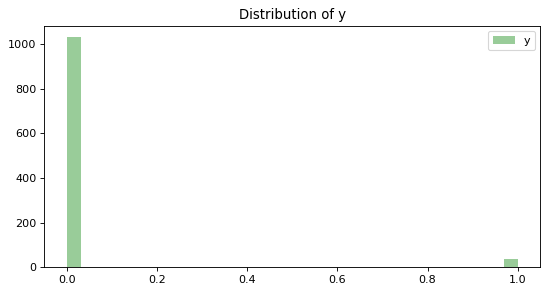

### Data Cleaner

,key,value
0,Meta,"{'float64': ['Mcg', ' Gvh', ' Alm', ' Mit', ' ..."
1,Dropped constant columns,[]
2,Dropped idness columns,[Unnamed: 0]
3,Dropped duplicated columns,None
4,-------------params-------------,-------------values-------------
5,nan_chars,None
6,correct_object_dtype,True
7,drop_constant_columns,True
8,drop_label_nan_rows,True
9,drop_idness_columns,True


### Train set & Eval set

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape
0,"(1187, 8)","(1187,)",None,None,"(119, 8)"


### Drift detection

,key,value
0,no drift features,"[Mcg, Gvh, Alm, Mit, Erl, Pox, Vac, Nuc]"
1,kept/dropped feature count,8/0
2,history,"[{'auc': 0.5404664855072464, 'n_features': 8, ..."
3,drift score,"{'Mcg': 0.4107755930087391, ' Gvh': 0.44424937..."


### Pipeline search

,trial No.,Previous reward,Best trial,Best reward,Total elapsed,Max trials
0,1,0,None,None,0.004293,100


#### Current Trial:

key,value
signature,e9cad2cdc0c382bd392ce5b1116fa921
vectors,"[2, 1, 0, 0, 3, 3]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.001
4-Module_CatBoostEstimator_1.depth,10
5-Module_CatBoostEstimator_1.l2_leaf_reg,20


#### Best Trial:

key,value
signature,e9cad2cdc0c382bd392ce5b1116fa921
vectors,"[2, 1, 0, 0, 3, 3]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.001
4-Module_CatBoostEstimator_1.depth,10
5-Module_CatBoostEstimator_1.l2_leaf_reg,20


### Ensemble

,0,1
0,weights,"[0.45, 0.25, 0.0, 0.0, 0.2, 0.0, 0.0, 0.1, 0.0..."
1,scores,"[0.9386412974077385, 0.9404716298471885, 0.941..."
2,best_stack,"[0, 1, 4, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 4, 7, ..."
3,hits,"{0: 9, 1: 5, 4: 4, 7: 2}"
4,ensemble_size,20


In [101]:
from hypergbm import make_experiment
exp = make_experiment('./datasets/train_set1.csv', 
                      target='Label',
                      eval_data='./datasets/val_set1.csv',
                      task='binary',
                      reward_metric='auc',
                      class_balancing='TomeksLinks',
                      max_trials=100,)
estimator = exp.run()

In [102]:
train_data = pd.read_csv('./datasets/test_set1.csv')
y_test = train_data.Label
X_test = train_data.drop('Label', axis=1)

In [103]:
y_ntest = y_test.reset_index(drop=True)
z = []
idx_dic1 = y_ntest.to_dict()
for k, p in idx_dic1.items():
    if p == 1:
        z.append(k)
X_ntest = X_test.reset_index(drop=True)
X_mtest = X_ntest.iloc[z]
y_mtest = y_ntest.iloc[z]

In [104]:
y_pred = estimator.predict(X_test)
1 - np.sum(np.abs(y_pred - y_test)) / y_pred.shape[0] # accuracy

0.9562289562289562

In [105]:
y_mpred = estimator.predict(X_mtest)
1 - np.sum(np.abs(y_mpred - y_mtest)) / (y_mpred.shape[0]) # accuracy

0.19999999999999996